# Отчет по лабораторной работе №8. Кластеризация

## Выполнение работы
В рамках лабораторной работы было выполнено:
1. Открыли файл в Google Colab (используйте собственный форк репозитория).
2. Решили задачи.
3. Сохранили результат в репозиторий github в директорию `./les08`.
4. Создали *pull request* в репозиторий: [https://github.com/chebotarevsa/dap-2024](https://github.com/chebotarevsa/dap-2024).
- Название pull request имеет формат: <Номер лабораторной работы> <Номер группы> <ФИО>.
5. Сдали работу в системе *Пегас*, в отчете указали ссылку на pull request.

**Ссылка на репозиторий GitHub (лабораторная работа №8): [https://github.com/ALEXANDER-ALLIS/dap-2024/tree/main/les08](https://github.com/ALEXANDER-ALLIS/dap-2024/tree/main/les08).**

Ирисы Фишера — набор данных для задачи классификации, на примере которого Рональд Фишер в 1936 году продемонстрировал работу разработанного им метода дискриминантного анализа. Иногда его также называют ирисами Андерсона, так как данные были собраны американским ботаником Эдгаром Андерсоном.

### Задание №1. Импортируйте модель данных «Ирисы Фишера»

In [3]:
from sklearn.datasets import load_iris

iris = load_iris()

df_iris = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df_iris['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

print(df_iris)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

       species  
0       se

### Задание №2. Выполните нормализацию данных

In [5]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

df_iris_norm = df_iris.copy()
df_iris_norm[iris.feature_names] = scaler.fit_transform(df_iris[iris.feature_names])

print(df_iris_norm.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  


### Задание №3. Постройте модель кластеризации используя алгоритм  DBSCAN (https://www.youtube.com/watch?v=svAtnZ5XjSI&t=494s), подберите подходящие параметры eps, min_samples

In [21]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

iris = load_iris()
X = iris.data  # Признаки

# Скалируем
X_scaled = StandardScaler().fit_transform(X)

dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

print(labels)
print("------------")

df = pd.DataFrame(X, columns=iris.feature_names) # Результаты
df["cluster"] = labels

# Итоговое распределение
print(df["cluster"].value_counts())

[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0 -1  0  0  0  0  0  0
  0  0  1  1  1  1  1  1  1 -1  1  1 -1  1 -1  1  1  1  1  1 -1  1  1  1
 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1
  1  1 -1  1  1  1  1  1  1 -1 -1  1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1  1  1 -1  1  1  1 -1 -1 -1  1  1  1 -1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1]
------------
cluster
 1    78
 0    46
-1    26
Name: count, dtype: int64


### Задание №4. Постройте диаграмму рассеяния для признаков «sepal length (cm)» «sepal width (cm)», цвет точек на диаграмме должен быть различным для разных кластеров

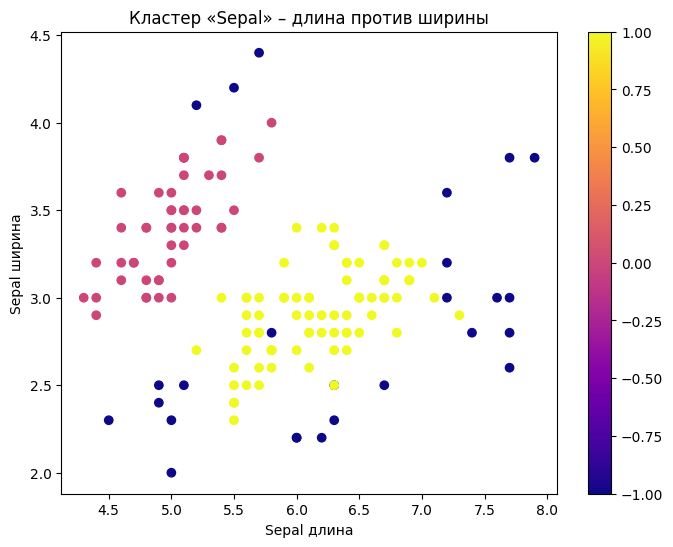

In [26]:
df_iris['cluster'] = labels

plt.figure(figsize=(8, 6))
plt.scatter(
    df_iris["sepal length (cm)"],
    df_iris["sepal width (cm)"],
    c=df_iris["cluster"],
    cmap="plasma"
)
plt.title("Кластер «Sepal» – длина против ширины")
plt.xlabel("Sepal длина")
plt.ylabel("Sepal ширина")
plt.colorbar()
plt.show()

### Задание №5. Сделайте вывод

В процессе выполнения исследования была проведена кластеризация данных «Ирисы Фишера» с использованием алгоритма DBSCAN. После проведения нормализации данных и оптимизации параметров удалось выделить несколько кластеров, которые соответствуют различным видам ирисов. Алгоритм продемонстрировал свою эффективность в выявлении плотных групп объектов без необходимости предварительного задания количества кластеров.